In [1]:
import sys
sys.path.append('/../../QmeQ/qmeq/')
#sys.path.append('../qmeq/')
import qmeq
import numpy as np
import matplotlib.pyplot as plt
import interpolation_runner as ip
import importlib

In [2]:
def fermi(mu, E, T):
    return 1/(1+np.exp((E-mu)/T))

In [ ]:
#--SETUP: ---------------------------------------------------------------------------------

V_B = 30
mu_L = -V_B/2       
mu_R = V_B/2        

gammaL = 0.3
gammaR = gammaL
T_L = 20
T_R = 1

In [25]:
#--SETUP: ---------------------------------------------------------------------------------
epsilons = np.linspace(-50, 50, 100)
lamdas = np.linspace(0,1,1)
T_L = 20
T_R = 1

#for plotting
V_B = -30
mu_L = -V_B/2       
mu_R = V_B/2  

if T_L > T_R:
    T_COLD = T_R
    T_HOT = T_L

INPUT = {
    'omega': 0.09,
    'u_intra': 1000,
    'u_inter': 200,
    'V_B': V_B,
    'gammaL': 0.3,
    'gammaR': 0.3,
    'T_L': T_L,
    'T_R': T_R,
}
       

In [28]:
importlib.reload(ip)
I, I_var, J_QH, P, eff, sigma, TUR = ip.run_interpolation(epsilons, lamdas, **INPUT)
I = I[0]

-17.676767676767675


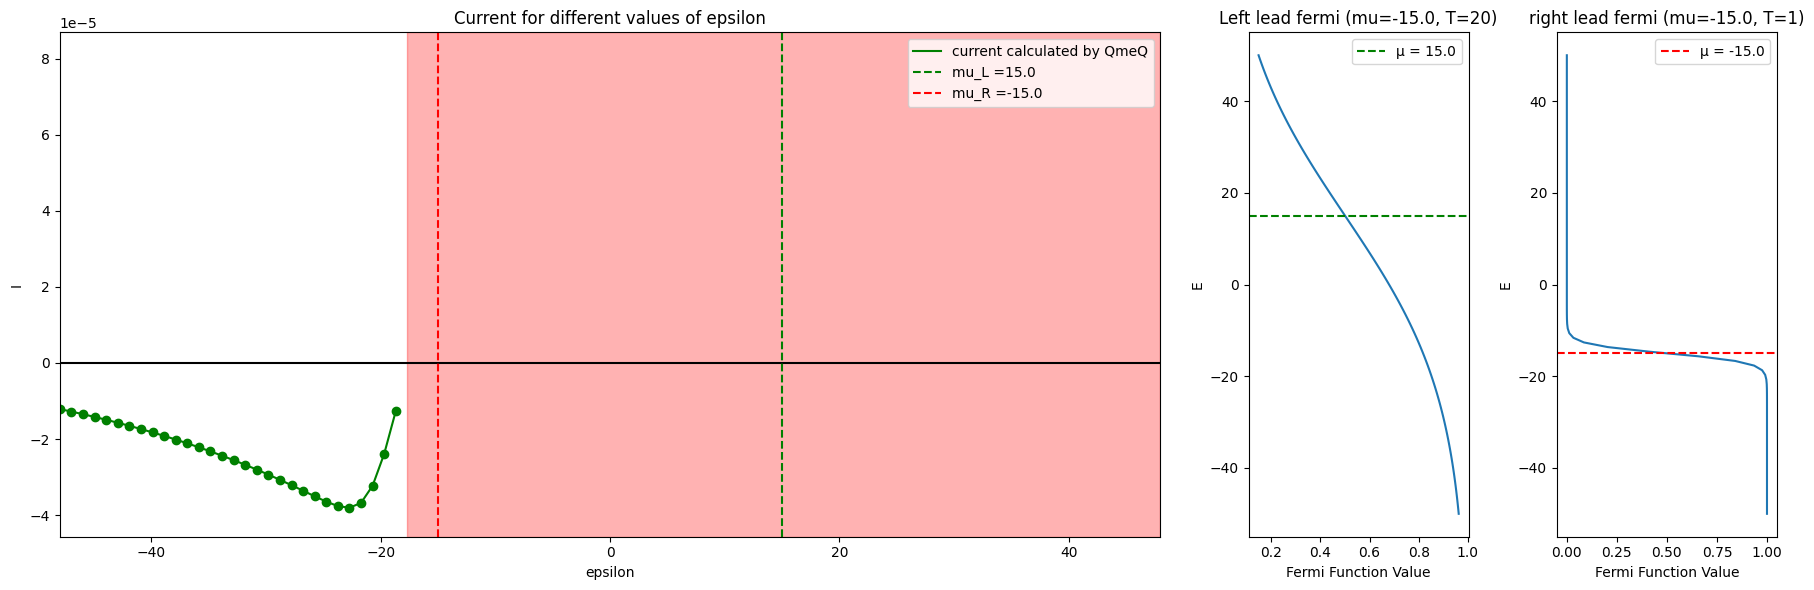

In [34]:
# With epsilon grid

#Finding where heat engine regime starts
idx = np.argmin(np.abs(I))
eps_at_zero_I = epsilons[idx]
print(eps_at_zero_I)

max_I = np.nanmax(I)  # Ignores NaN values
min_I = np.nanmin(I)  # Ignores NaN values

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), gridspec_kw={'width_ratios': [5, 1, 1]}) 

y_lower, y_upper = 1.2*min_I, 1.2*max_I+0.0001
x_lower, x_upper = -48, 48
ax1.plot(epsilons, I, color='green', label='current calculated by QmeQ')
ax1.scatter(epsilons, I, color='green')
ax1.set_ylim(y_lower, y_upper)
ax1.set_xlim(x_lower, x_upper)
ax1.fill_between(epsilons, y_lower, y_upper, where=(epsilons >= eps_at_zero_I) & (epsilons <= x_upper), color='red', alpha=0.3)
ax1.annotate('Heat engine', 
             xy=(25, -0.02),  # Position of the annotation
             xytext=(25, -0.02),  # Position of the text
             fontsize=12, color='black')  # Text customization
ax1.axhline(y=0, color='black', linestyle='-')
ax1.axvline(x=mu_L, color='g', linestyle='--', label=f'mu_L ={mu_L}')
ax1.axvline(x=mu_R, color='r', linestyle='--', label=f'mu_R ={mu_R}')
ax1.set_xlabel('epsilon')
ax1.set_ylabel('I')
ax1.set_title('Current for different values of epsilon')
ax1.legend()

# Second plot - Fermi function in Left lead
fermi_L = fermi(mu_L, epsilons, T_L)
ax2.plot(fermi_L, epsilons)
ax2.axhline(y=mu_L, color='g', linestyle='--', label=f'μ = {mu_L}') 
ax2.set_xlabel('Fermi Function Value')
ax2.set_ylabel('E')
ax2.set_title(f'Left lead fermi (mu={mu_R}, T={T_L})')
ax2.legend()

# Third plot - Fermi function in right lead
fermi_R = fermi(mu_R, epsilons, T_R)
ax3.plot(fermi_R, epsilons)
ax3.axhline(y=mu_R, color='r', linestyle='--', label=f'μ = {mu_R}')
ax3.set_xlabel('Fermi Function Value')
ax3.set_ylabel('E')
ax3.set_title(f'right lead fermi (mu={mu_R}, T={T_R})')
ax3.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()